In [1]:
import numpy as np
import skfda
from fpca import FPCABasis, FPCADiscretized
from skfda.representation.basis import FDataBasis
from skfda.datasets._real_datasets import fetch_growth
from matplotlib import pyplot

We use the Berkeley Growth Study data for the purpose of illustrating how functional principal component analysis works

In [2]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

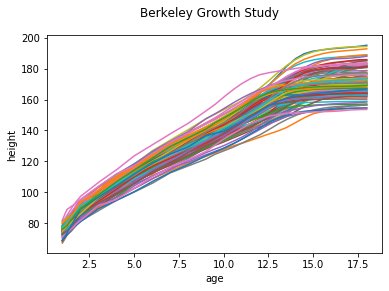

In [3]:
fd.plot()
pyplot.show()

In this case, we do not transform the data to a certain basis. We analyse the functional principal components using the discretized data. Observe that there are abrupt changes in the principal components

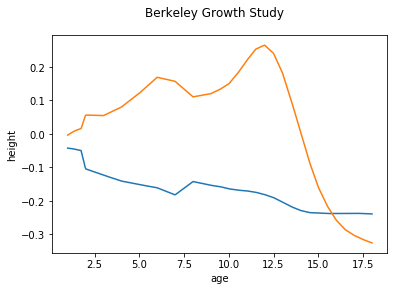

In [4]:
discretizedFPCA = FPCADiscretized(2)
discretizedFPCA.fit(fd)
discretizedFPCA.components.plot()
pyplot.show()

we can choose to use eigenvalue and eigenvector analysis rather than using singular value decomposition, which is the default behaviour. Please note that it is more efficient to use svd

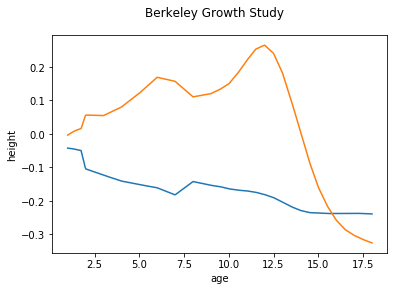

In [5]:
discretizedFPCA = FPCADiscretized(2, svd=False)
discretizedFPCA.fit(fd)
discretizedFPCA.components.plot()
pyplot.show()

The scores (percentage) the first n components has over all the components

In [6]:
discretizedFPCA.transform(fd)

array([0.80414823, 0.13861057])

Now we study the dataset using its basis representation

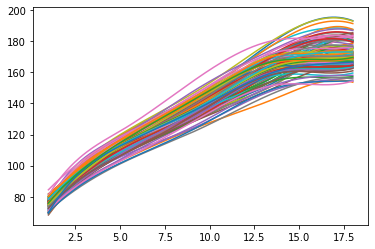

In [7]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

basis = skfda.representation.basis.BSpline(n_basis=7)
basisfd = fd.to_basis(basis)

basisfd.plot()
pyplot.show()

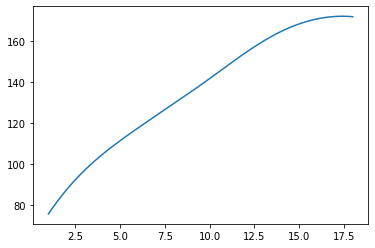

In [8]:
# obtain the mean function of the dataset for representation purposes
meanfd = basisfd.mean()

meanfd.plot()
pyplot.show()


Obtain first two principal components, observe that those two are very similar to the principal components obtained in the discretized analysis, only smoother due to the basis representation

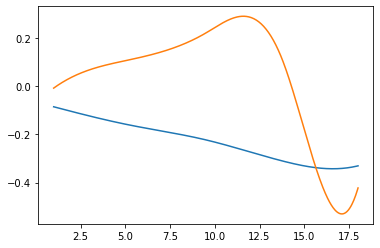

In [10]:
fpca = FPCABasis(2)
fpca.fit(basisfd)
fpca.components.plot()
pyplot.show()

Fetch the dataset again as the module modified the original data and centers the original data.
The mean function is distorted after such transformation

In [13]:
dataset = fetch_growth()
fd = dataset['data']
basis = skfda.representation.basis.BSpline(n_basis=7)
basisfd = fd.to_basis(basis)

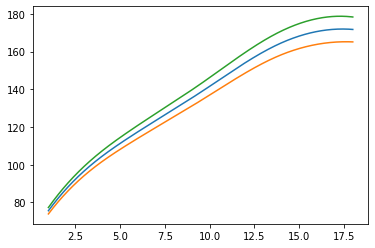

In [15]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[0, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 20 * fpca.components.coefficients[0, :]])

meanfd.plot()
pyplot.show()

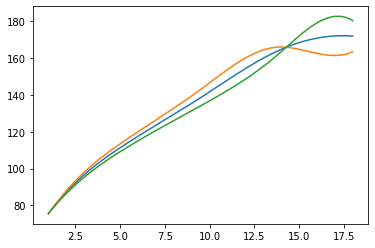

In [17]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[1, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 20 * fpca.components.coefficients[1, :]])

meanfd.plot()
pyplot.show()